In [4]:
'''
All labeled videos in PA-HMDB51 are used as testing set.
The rest videos in HMDB51 are used as training set.
This script gets the file names of PA_HMDB51 dataset.
'''

import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(['/Users/wuzhenyu/.matplotlib/stylelib/science.mplstyle', 
               '/Users/wuzhenyu/.matplotlib/stylelib/ieee.mplstyle'])
import json, os, csv

from calculate_statistics import attribute_list, attribute_value_dict


attr_list = [attr.replace('_', ' ') for attr in attribute_list]
attr_value_dict = {k.replace('_', ' '):v for k,v in attribute_value_dict.items()}
attr_value_num = json.load(open(os.path.join("attr_value_num.json")))
attr_value_num = {k.replace('_', ' '):v for k,v in attr_value_num.items()}
skin_color_lst = attr_value_num['skin color']
attr_value_num['skin color'] = [skin_color_lst[0], skin_color_lst[1], skin_color_lst[2], skin_color_lst[3], sum(skin_color_lst[-3:])]

print(attr_value_dict)
print(attr_value_num)

{'skin color': ['Unidentifiable', 'White', 'Brown/Yellow', 'Black', 'Coexisting'], 'relationship': ['Unidentifiable', 'Identifiable'], 'face': ['Invisible', 'Partial', 'Complete'], 'nudity': ['No-nudity', 'Partial-nudity', 'Semi-nudity'], 'gender': ['Unidentifiable', 'Male', 'Female', 'Coexisting']}
{'face': [13088, 20037, 19288], 'gender': [1061, 29075, 18629, 3648], 'nudity': [21099, 23241, 8072], 'relationship': [44205, 8208], 'skin color': [1477, 36995, 7586, 5419, 936]}


In [5]:
# construct attribute_value_num_mat:
attr_value_num_mat = np.zeros((5,5)) # all initialized as 0.
for i in range(5):
    each_attr_value_num = attr_value_num[attr_list[i]]
    print(each_attr_value_num, np.sum(each_attr_value_num))
    attr_value_num_mat[i,0:len(each_attr_value_num)] = each_attr_value_num
print('attribute_value_num_mat:\n', attr_value_num_mat)
print(np.sum(attr_value_num_mat, axis=1))

[1477, 36995, 7586, 5419, 936] 52413
[44205, 8208] 52413
[13088, 20037, 19288] 52413
[21099, 23241, 8072] 52412
[1061, 29075, 18629, 3648] 52413
attribute_value_num_mat:
 [[ 1477. 36995.  7586.  5419.   936.]
 [44205.  8208.     0.     0.     0.]
 [13088. 20037. 19288.     0.     0.]
 [21099. 23241.  8072.     0.     0.]
 [ 1061. 29075. 18629.  3648.     0.]]
[52413. 52413. 52413. 52412. 52413.]


In [6]:
def plot_attribute_distribution():

    '''
    Plot privacy attribut - Number of Frames (i.e., Fig 5 in camera ready version)
    '''
    plt.figure(figsize=(16, 12))
    colors = ['r', 'g', 'b', 'm']
    

    
    
    # plot:
    for j in range(4):
        if j == 0:
            plt.bar(range(5), attr_value_num_mat[:,j], 
                label=j, tick_label=attr_list, fc=colors[j], width=0.4)
        else:
            plt.bar(range(5), attr_value_num_mat[:,j], bottom=np.sum(attr_value_num_mat[:,0:j], axis=1), 
                label=j, tick_label=attr_list, fc=colors[j], width=0.4)
    
    plt.tick_params(labelsize=fontsize_ticks)
    plt.ylim(0,65000)
    font = {'family': 'Times New Roman',
            'color':  'black',
            'weight': 'semibold',
            'size': fontsize_axis_labels,
    }
    plt.xlabel('Privacy Attribute', fontdict=font)
    plt.ylabel('Number of Frames', fontdict=font)
    plt.legend(prop={'size': fontsize_legend}, ncol=4, loc='upper center', framealpha=0.9)
    plt.gcf().subplots_adjust(left=0.12, right=0.96, top=0.98, bottom=0.08)
    plt.savefig('attribute_distribution.pdf',bbox_inches="tight", pad_inches=0)

0
738.5 1477.0
1
22102.5 44205.0
2
6544.0 13088.0
3
10549.5 21099.0
4
530.5 1061.0
0
19974.5 36995.0
1
48309.0 8208.0
2
23106.5 20037.0
3
32719.5 23241.0
4
15598.5 29075.0
0
42265.0 7586.0
1
52413.0 0.0
2
42769.0 19288.0
3
48376.0 8072.0
4
39450.5 18629.0
0
48767.5 5419.0
1
52413.0 0.0
2
52413.0 0.0
3
52412.0 0.0
4
50589.0 3648.0
0
51945.0 936.0
1
52413.0 0.0
2
52413.0 0.0
3
52412.0 0.0
4
52413.0 0.0


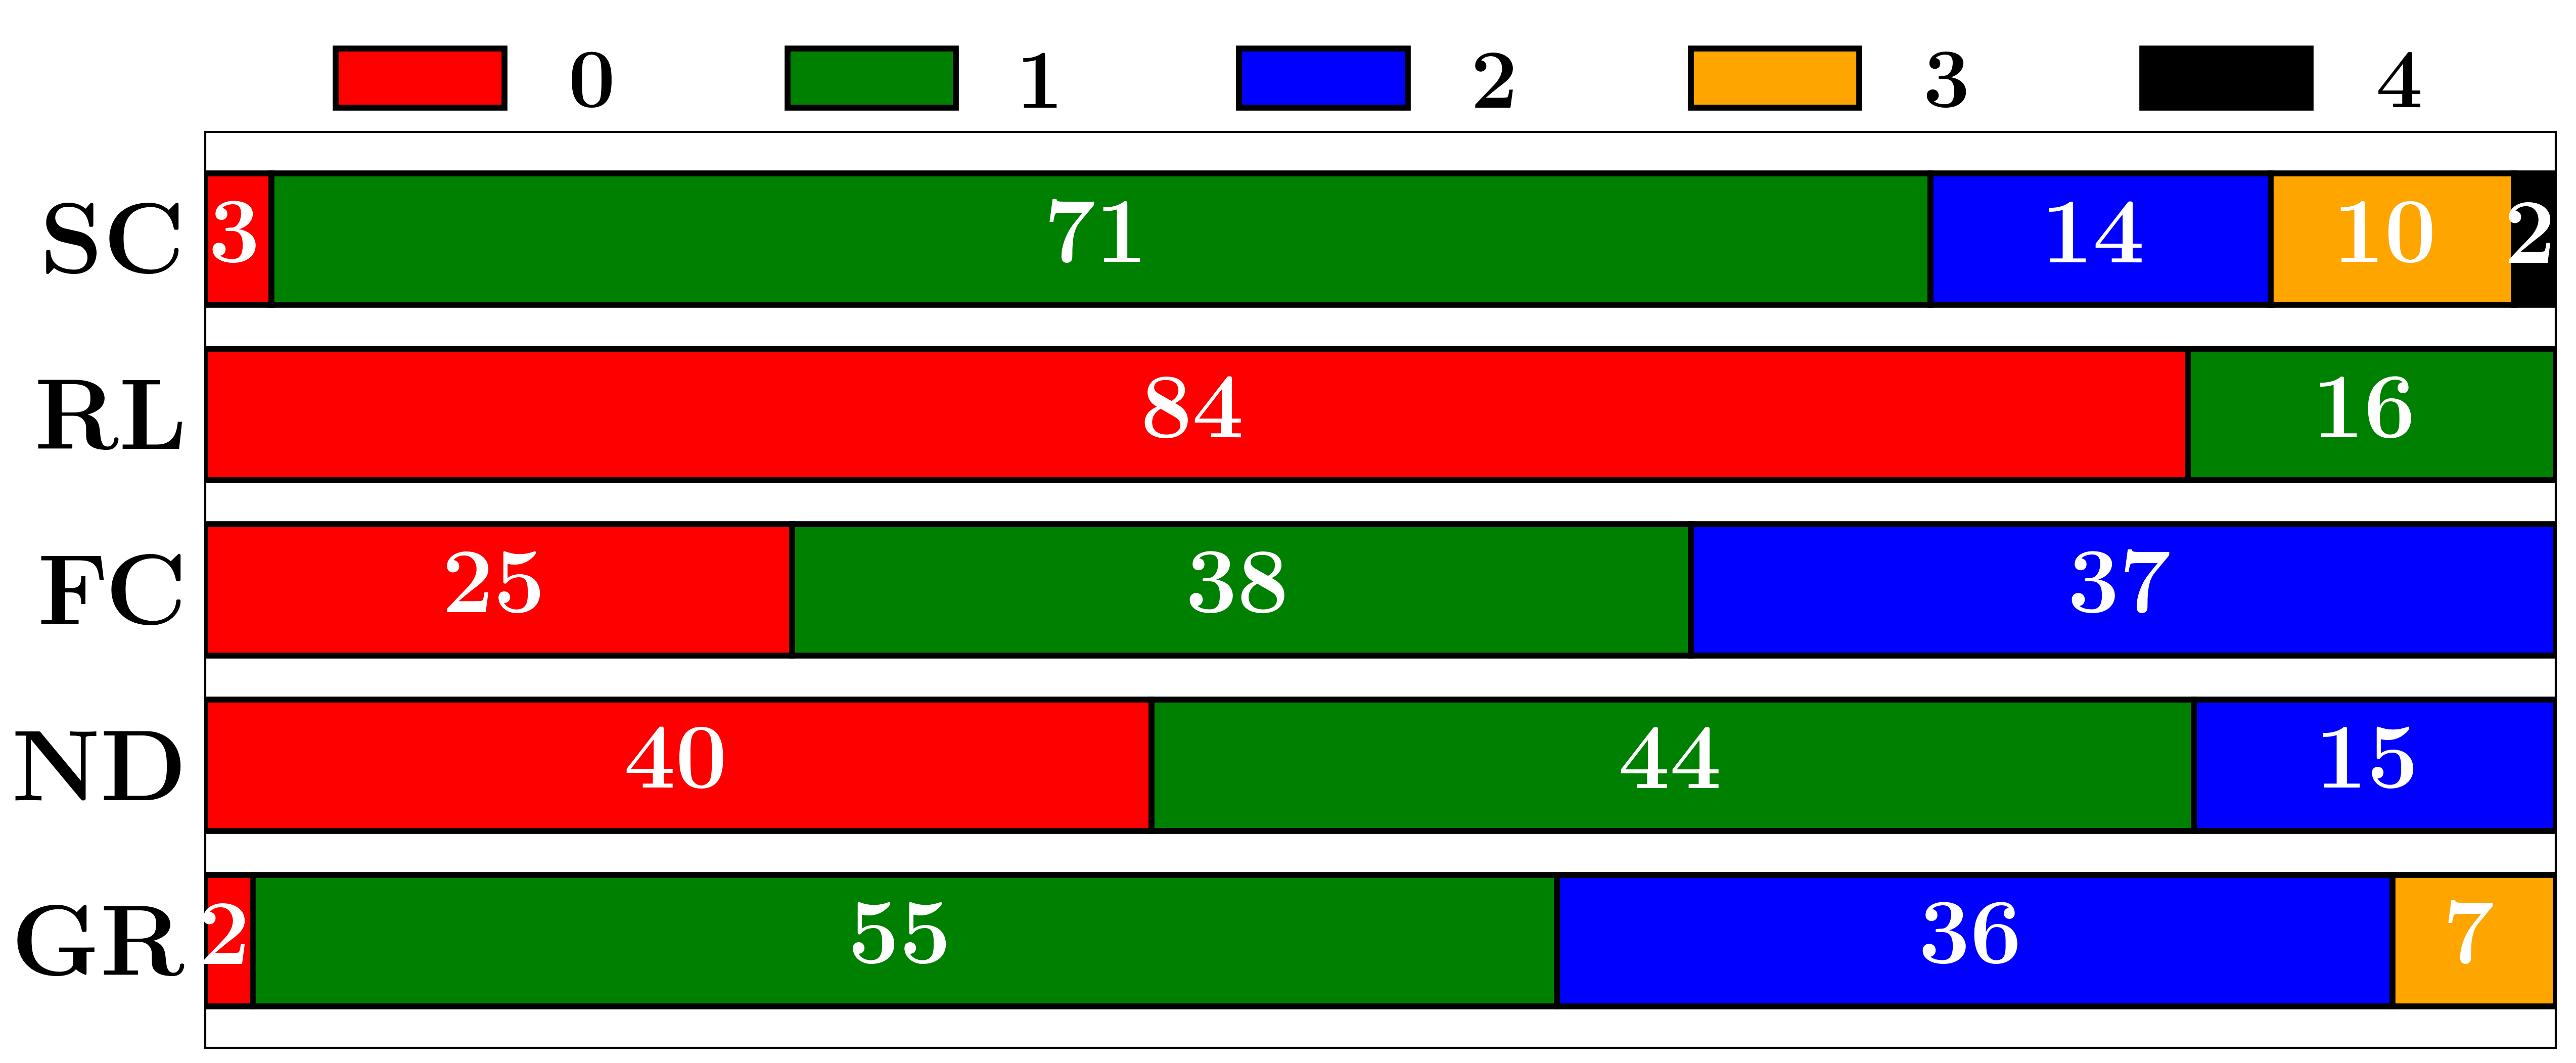

In [7]:
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

# font = {'family': 'Times New Roman',
#         'color':  'black',
#         'weight': 'semibold',
#         'size': 24,
# }

def plot_attribute_distribution_transposed():
    category_names = ['$\\bf{0}$', '$\\bf{1}$', '$\\bf{2}$', '$\\bf{3}$', '$\\bf{4}$']

    results = {
        '$\\bf{SC}$': list(attr_value_num_mat[0]),
        '$\\bf{RL}$': list(attr_value_num_mat[1]),
        '$\\bf{FC}$': list(attr_value_num_mat[2]),
        '$\\bf{ND}$': list(attr_value_num_mat[3]),
        '$\\bf{GR}$': list(attr_value_num_mat[4])
    }

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    category_colors = ['red', 'green', 'blue', 'orange', 'black']
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.75,
                label=colname, color=color, edgecolor='k', linewidth=1.4)
        xcenters = starts + widths / 2

        for y, (x, c) in enumerate(zip(xcenters, widths)):
            print(y)
            print(x,c)
            ratio = float(c) / 52413.0
            if ratio > 1e-5:
                round_ratio = round(ratio*100)
                digit = round_ratio % 10
                tens = round_ratio // 10
                if tens > 0:
                    ax.text(x, y, r'$\boldsymbol{}\boldsymbol{}$'.format(tens, digit), ha='center', va='center',
                        color='w', fontsize=22)
                else:
                    ax.text(x, y, r'$\boldsymbol{}$'.format(digit), ha='center', va='center',
                        color='w', fontsize=22)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.5, 1.05),
              loc='center', fontsize=20, frameon=False)
    ax.tick_params(labelsize=24, which='both', axis='y', length=0)
    plt.savefig('attributes_distribution.pdf', bbox_inches="tight", pad_inches=0)
    
if __name__ == '__main__':
    # plot_attribute_distribution()
    plot_attribute_distribution_transposed()